In [56]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import splitfolders
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [79]:
print(tf. __version__)

2.15.0


In [39]:
train_path = "/Users/garvsawhney/Downloads/PlantVillage(split)/train"
val_path = "/Users/garvsawhney/Downloads/PlantVillage(split)/val"

In [40]:
IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
NUM_CLASSES = 6

In [48]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4988 files belonging to 6 classes.


In [49]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1664 files belonging to 6 classes.


In [58]:
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

    Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'),

    Conv2D(256, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'),

    Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),

    Conv2D(384, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),

    Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'),

    Flatten(),

    Dense(4096, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),

    Dense(4096, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])


In [59]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 32, 32, 96)        34944     
                                                                 
 batch_normalization_85 (Ba  (None, 32, 32, 96)        384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 16, 16, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 16, 16, 256)       614656    
                                                                 
 batch_normalization_86 (Ba  (None, 16, 16, 256)       1024      
 tchNormalization)                                               
                                                     

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [62]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=100,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
156/156 [==============================] - 304s 2s/step - loss: 9.1404 - accuracy: 0.4419 - val_loss: 10.0329 - val_accuracy: 0.2927 - lr: 0.0010
Epoch 2/100
156/156 [==============================] - 361s 2s/step - loss: 4.9287 - accuracy: 0.6427 - val_loss: 5.5971 - val_accuracy: 0.4147 - lr: 0.0010
Epoch 3/100
156/156 [==============================] - 369s 2s/step - loss: 4.0611 - accuracy: 0.6995 - val_loss: 5.6023 - val_accuracy: 0.4627 - lr: 0.0010
Epoch 4/100
156/156 [==============================] - 371s 2s/step - loss: 3.3770 - accuracy: 0.7392 - val_loss: 3.5881 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 5/100
156/156 [==============================] - 374s 2s/step - loss: 2.8756 - accuracy: 0.7672 - val_loss: 3.4880 - val_accuracy: 0.5607 - lr: 0.0010
Epoch 6/100
156/156 [==============================] - 369s 2s/step - loss: 2.5507 - accuracy: 0.7823 - val_loss: 3.1327 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 7/100
156/156 [==============================] - 36

In [63]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

156/156 [==============================] - 64s 402ms/step - loss: 1.3711 - accuracy: 0.8268
Training accuracy: 0.8267842531204224


In [64]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

52/52 [==============================] - 18s 338ms/step - loss: 1.4770 - accuracy: 0.8041
Validation accuracy: 0.8040865659713745


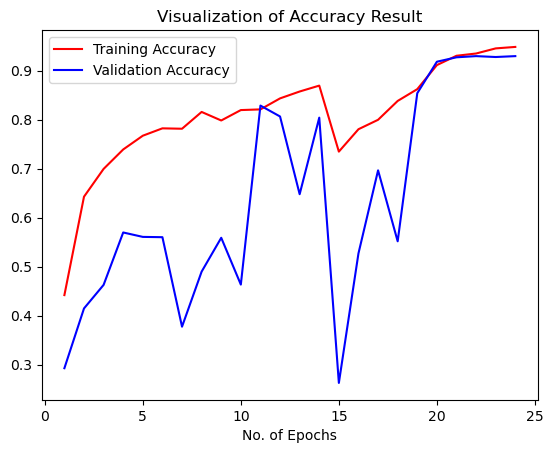

In [66]:
epochs = [i for i in range(1,25)]
plt.plot(epochs, history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

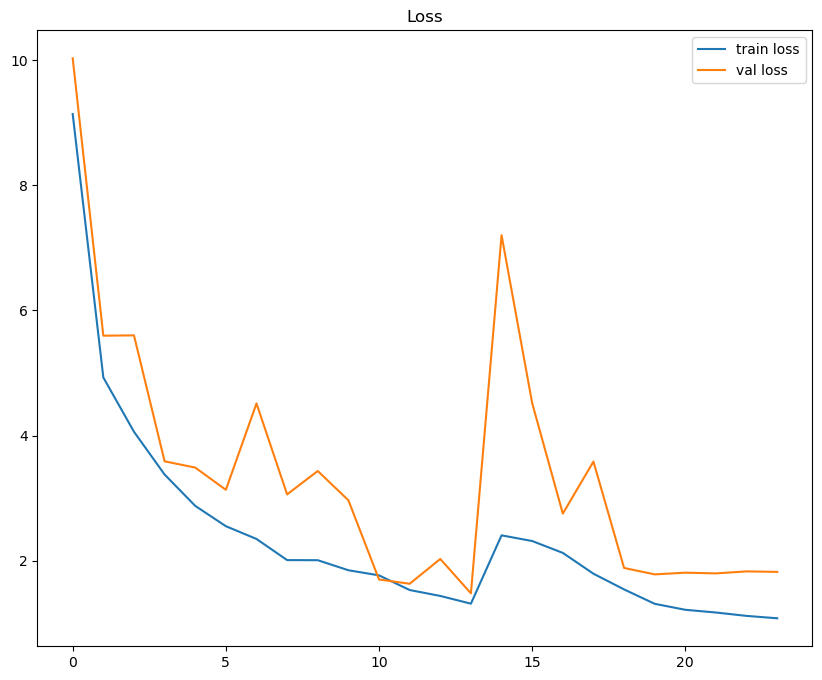

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

In [68]:
class_name = validation_set.class_names

In [69]:
test_set = tf.keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1664 files belonging to 6 classes.


In [70]:
class_name = validation_set.class_names
print(class_name)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']


In [71]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1664/1664 [==============================] - 59s 35ms/step


In [72]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [73]:
Y_true

<tf.Tensor: shape=(1664,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5])>

In [74]:
predicted_categories

<tf.Tensor: shape=(1664,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5])>

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [76]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.97      0.91      0.94       250
 Potato___Late_blight       0.88      0.56      0.68       250
     Potato___healthy       1.00      0.03      0.05        38
  Tomato_Early_blight       0.53      0.87      0.66       250
   Tomato_Late_blight       0.79      0.75      0.77       478
       Tomato_healthy       0.97      0.99      0.98       398

             accuracy                           0.80      1664
            macro avg       0.86      0.68      0.68      1664
         weighted avg       0.84      0.80      0.80      1664



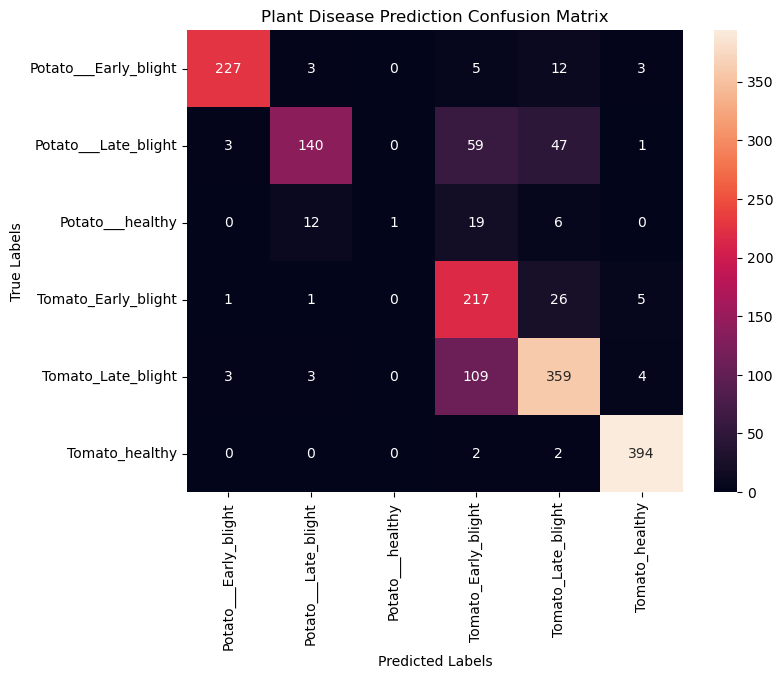

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=True,
            xticklabels=class_name, yticklabels=class_name)
plt.title('Plant Disease Prediction Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()